In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

# 1. Reading Data

In [2]:
orderprdtrain_df = pd.read_csv(r'C:\Sanal\data_science_dreamjob\portfolio project\instacart-market-basket-analysis\order_products__train.csv')
orderprdprior_df = pd.read_csv(r'C:\Sanal\data_science_dreamjob\portfolio project\instacart-market-basket-analysis\order_products__prior.csv')
orders_df = pd.read_csv(r'C:\Sanal\data_science_dreamjob\portfolio project\instacart-market-basket-analysis\orders.csv')
products_df = pd.read_csv(r'C:\Sanal\data_science_dreamjob\portfolio project\instacart-market-basket-analysis\products.csv')
aisles_df = pd.read_csv(r'C:\Sanal\data_science_dreamjob\portfolio project\instacart-market-basket-analysis\aisles.csv')
departments_df = pd.read_csv(r'C:\Sanal\data_science_dreamjob\portfolio project\instacart-market-basket-analysis\departments.csv')


# 2. Understanding Data

In [3]:
df_list = [orders_df, orderprdtrain_df,orderprdprior_df,products_df,aisles_df,departments_df]

In [4]:
for df in df_list:
    print(df.shape)

(3421083, 7)
(1384617, 4)
(32434489, 4)
(49688, 4)
(134, 2)
(21, 2)


# 2.1 Order table data

In [5]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
# total number of orders and users
print('Total orders:' ,orders_df['order_id'].nunique())
print('Total customers:' ,orders_df['user_id'].nunique())

Total orders: 3421083
Total customers: 206209


In [7]:
#checking for nan values in days_since_prior order
print('Null values in the days_since_prior_order:',orders_df['days_since_prior_order'].isnull().sum())
orders_df['days_since_prior_order'].fillna(0.0, inplace=True)
print('-'*75)
orders_df.head()

Null values in the days_since_prior_order: 206209
---------------------------------------------------------------------------


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
#checking for nan values in other columns
print("Total  Null Values for order_dow:",orders_df['order_dow'].isnull().sum())
print("Total  Null Values for order_hour_of_day:",orders_df['order_hour_of_day'].isnull().sum())

Total  Null Values for order_dow: 0
Total  Null Values for order_hour_of_day: 0


# 2.2 Products table data

In [9]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
# total number of products


In [11]:
print('Total number of products:',products_df['product_id'].nunique())

Total number of products: 49688


# 2.3 Aisles table data

In [12]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [13]:
# total number of aisle
print("Total number of aisles - ",aisles_df['aisle'].nunique())

Total number of aisles -  134


# 2.4 Department table data

In [14]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [15]:
# total number of departments
print("Total number of departments - ",departments_df['department_id'].nunique())

Total number of departments -  21


# 3. EDA

In [109]:
def bar_plot(data, xlabel, ylabel, title):
    plt.figure(figsize=(8,8))
    sns.barplot(data.index, data.values)
    plt.xlabel(xlabel,fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    plt.title(title, fontsize = 14)
    plt.xticks(rotation='vertical')
    return plt.show() 

# 3.1 eval_set column break-dowm

C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


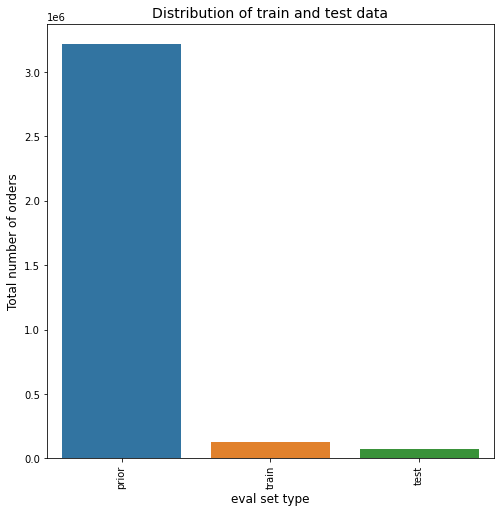

In [110]:
eval_set = orders_df['eval_set'].value_counts()
bar_plot(eval_set,'eval set type','Total number of orders','Distribution of train and test data')

In [111]:
# % composition of eval_set
print("Total train orders - ",len(orders_df[orders_df['eval_set']=='train']))
print("Percentage of train orders - ", np.round((len(orders_df[orders_df['eval_set']=='train'])/len(orders_df['eval_set']))*100))
print("Total test orders - ",len(orders_df[orders_df['eval_set']=='test']))
print("Percentage of test orders - ", np.round((len(orders_df[orders_df['eval_set']=='test'])/len(orders_df['eval_set']))*100))
print("Number of prior orders - ",len(orders_df[orders_df['eval_set']=='prior']))
print("Percentage of prior orders - ", np.round((len(orders_df[orders_df['eval_set']=='prior'])/len(orders_df['eval_set']))*100))

Total train orders -  131209
Percentage of train orders -  4.0
Total test orders -  75000
Percentage of test orders -  2.0
Number of prior orders -  3214874
Percentage of prior orders -  94.0


# 3.2  Day of the Week Most Orders Placed

C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


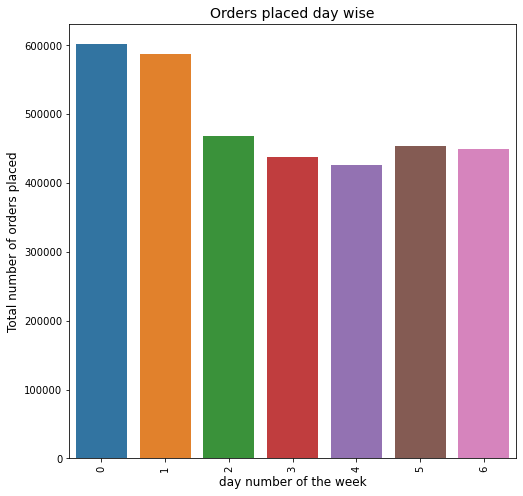

In [112]:
dow = orders_df['order_dow'].value_counts()
bar_plot(dow,'day number of the week','Total number of orders placed','Orders placed day wise')

This data shows that there has been an uptick in orders placed on weekends. Instacart business models is about shoppers buying goods rather than customers going shopping. So really weekends does not matter. Basically you are looking at when you home. so wfh should not have impacted this trend. So i would not draw any serious conclusions from the same

# 3.3  Time of Day Most Orders Placed

C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


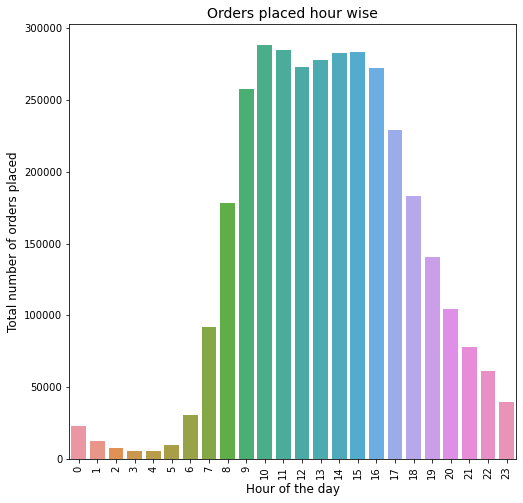

In [113]:
hod = orders_df['order_hour_of_day'].value_counts()
bar_plot(hod,'Hour of the day','Total number of orders placed','Orders placed hour wise')

# 3.4 days since the prior order vs the current order

C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


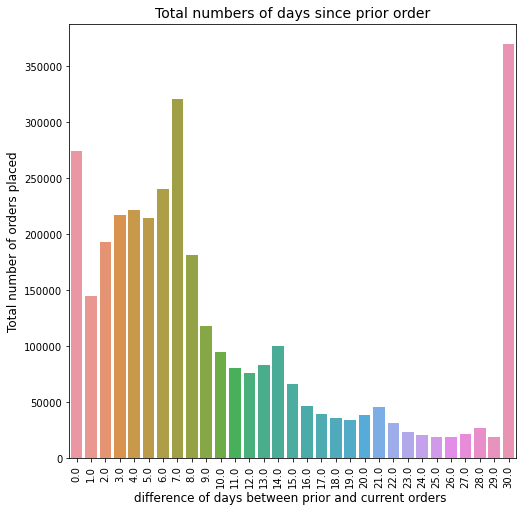

In [114]:
orddiff = orders_df['days_since_prior_order'].value_counts()
bar_plot(orddiff,'difference of days between prior and current orders ','Total number of orders placed','Total numbers of days since prior order')

# 3.5 How many order did each customer place?

In [115]:
print('Total number of unique customers -', orders_df['user_id'].unique().max())

Total number of unique customers - 206209


In [116]:
max_orders_placed_df = orders_df.groupby('user_id')['order_number'].aggregate('max')
max_orders_placed_df.head()

user_id
1    11
2    15
3    13
4     6
5     5
Name: order_number, dtype: int64

In [117]:
max_orders_placed_df = max_orders_placed_df.value_counts()
max_orders_placed_df.head()

4    23986
5    19590
6    16165
7    13850
8    11700
Name: order_number, dtype: int64

C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


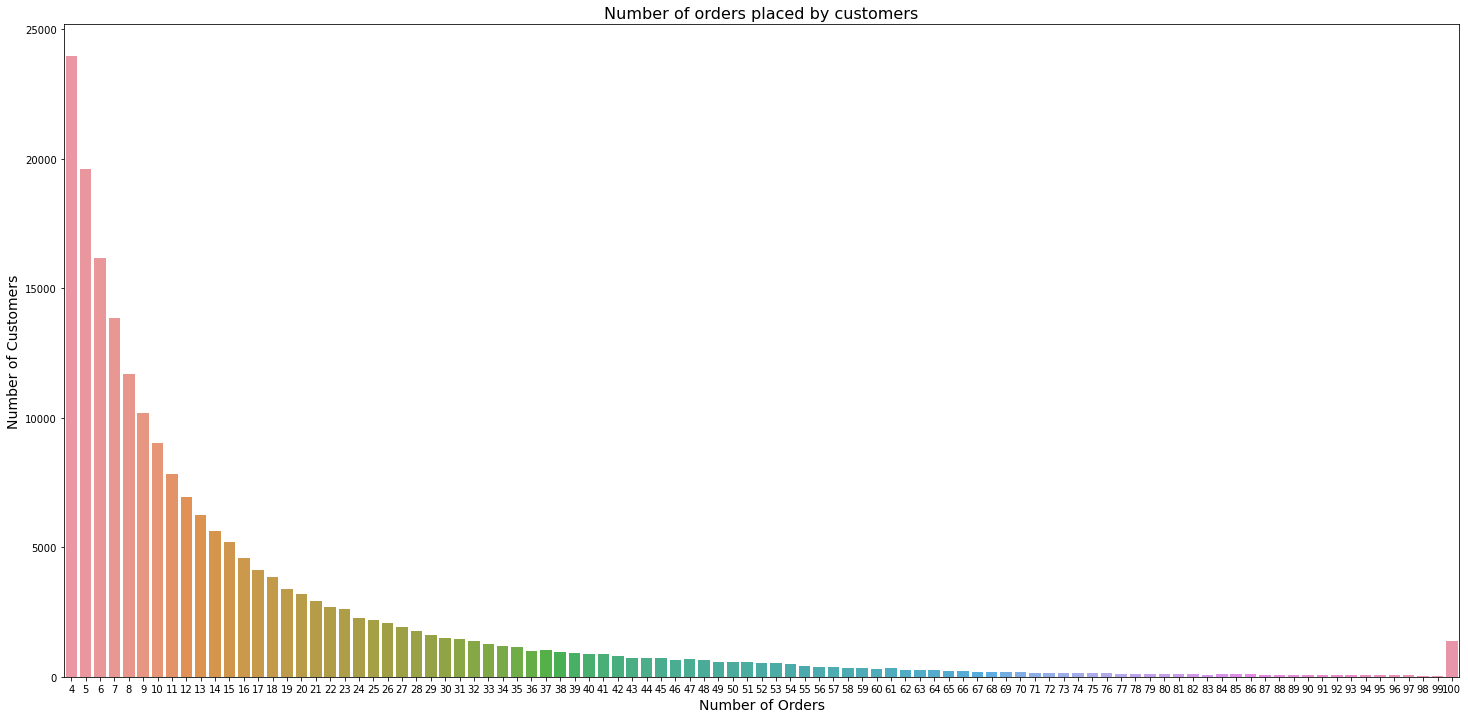

In [118]:
plt.figure(figsize=(25,12))
sns.barplot(max_orders_placed_df.index, max_orders_placed_df.values)
plt.ylabel('Number of Customers', fontsize = 14)
plt.xlabel('Number of Orders',fontsize = 14)
plt.title('Number of orders placed by customers', fontsize = 16)
plt.show() 

Maximum number of customers have placed 4 orders i.e around 23986 customers have placed 4 orders
Although the graph keeps falling customers who have placed 100 orders are more than customers who have placed orders between 30 to 99.

# 3.6 Products Data

In [119]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# 3.7 Number of products in each department

In [120]:
prod_dept_df = products_df.merge(departments_df)

In [121]:
prod_dept_df.head()

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,16,Mint Chocolate Flavored Syrup,103,19,snacks
2,25,Salted Caramel Lean Protein & Fiber Bar,3,19,snacks
3,32,Nacho Cheese White Bean Chips,107,19,snacks
4,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,snacks


In [122]:
dept_count = prod_dept_df['department'].value_counts()
dept_count

personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
bakery             1516
deli               1322
missing            1258
international      1139
breakfast          1115
babies             1081
alcohol            1054
pets                972
meat seafood        907
other               548
bulk                 38
Name: department, dtype: int64

C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


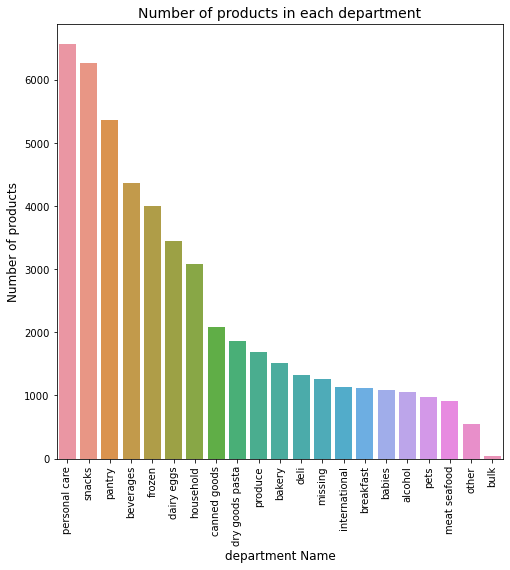

In [123]:
bar_plot(dept_count,'department Name','Number of products','Number of products in each department')

There are around 21 departments, with the top 6 departments having more than 3000 products each

# 3.8 Number of products in each aisle

In [124]:
prod_aisle_df = products_df.merge(aisles_df)
prod_aisle_df.head()

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes
2,102,Danish Butter Cookies,61,19,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes


In [125]:
aisle_count = prod_aisle_df['aisle'].value_counts()
aisle_count 

missing                         1258
candy chocolate                 1246
ice cream ice                   1091
vitamins supplements            1038
yogurt                          1026
                                ... 
frozen juice                      47
baby accessories                  44
packaged produce                  32
bulk grains rice dried goods      26
bulk dried fruits vegetables      12
Name: aisle, Length: 134, dtype: int64

C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


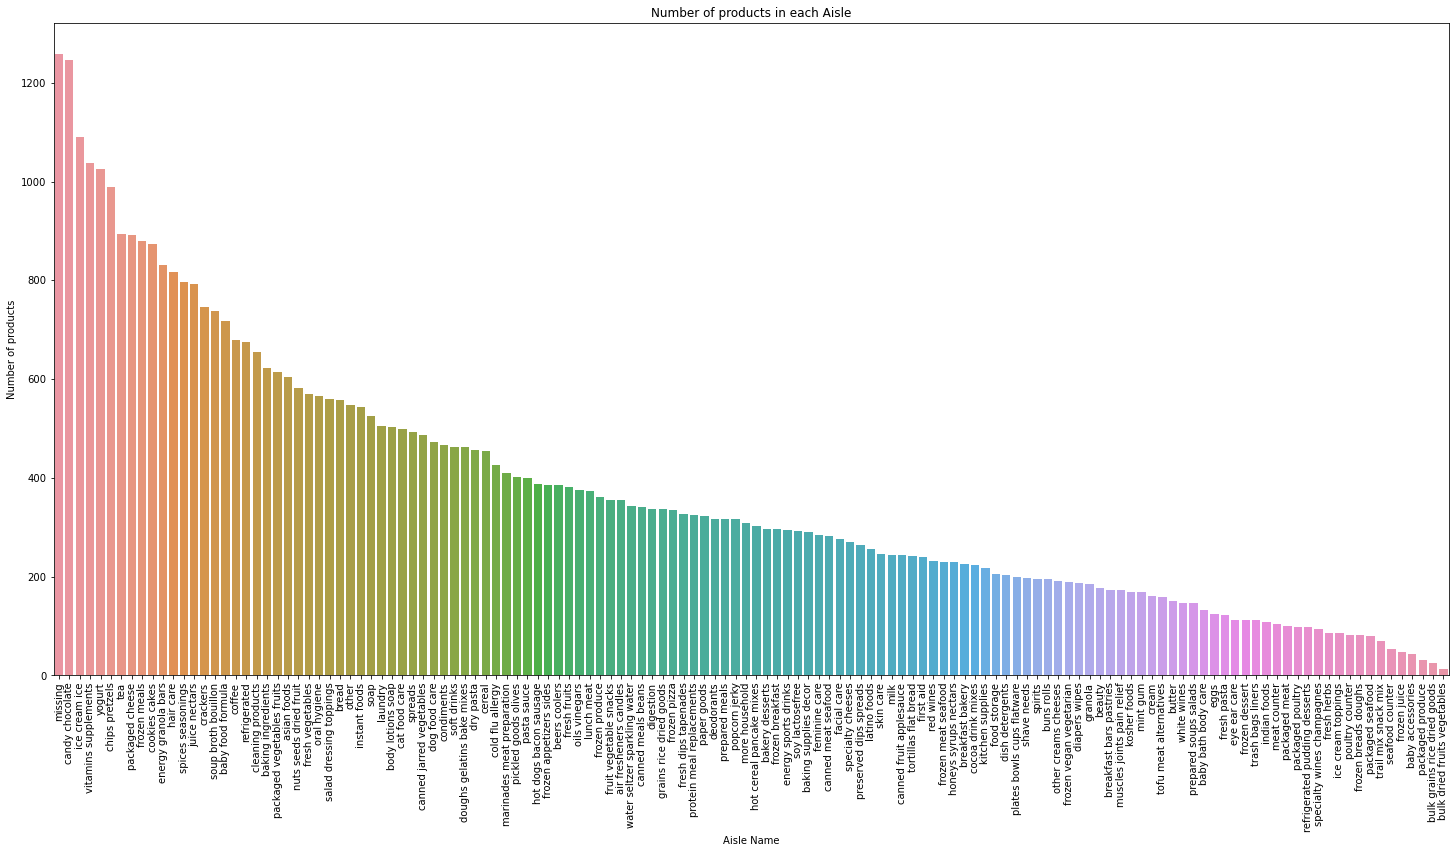

In [126]:
plt.figure(figsize=(25,12))
sns.barplot(aisle_count.index, aisle_count.values)
plt.ylabel('Number of products', fontsize = 10)
plt.xlabel('Aisle Name',fontsize = 10)
plt.title('Number of products in each Aisle', fontsize = 12)
plt.xticks(rotation='vertical')
plt.show() 

# 3.9 Order Products Prior and Order Products Train

In [127]:
orderprdprior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [128]:
orderprdtrain_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


# 3.10 Reordered Plots for prior and recent orders

C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


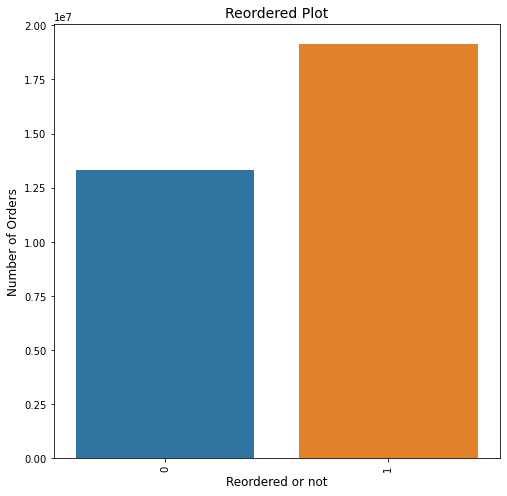

In [129]:
#prior orders
reord = orderprdprior_df['reordered'].value_counts()
bar_plot(reord,'Reordered or not','Number of Orders','Reordered Plot')

In [130]:
# % of reorder
print('Total number of products ordered -', len(orderprdprior_df))
print('Total number of reorders products -', len(orderprdprior_df[orderprdprior_df['reordered'] ==1]))
print('% of reorders -', len(orderprdprior_df[orderprdprior_df['reordered'] ==1])/len(orderprdprior_df))

Total number of products ordered - 32434489
Total number of reorders products - 19126536
% of reorders - 0.5896974667922161


# train orders
counts = orderprdtrain_df['reordered'].value_counts()
bar_plot(counts,'Reordered or not','Number of Orders','Reordered Plot')

In [131]:
print('Total number of products ordered -', len(orderprdtrain_df))
print('Total number of reorders products -', len(orderprdtrain_df[orderprdtrain_df['reordered'] ==1]))
print('% of reorders -', len(orderprdtrain_df[orderprdtrain_df['reordered'] ==1])/len(orderprdtrain_df)*100)

Total number of products ordered - 1384617
Total number of reorders products - 828824
% of reorders - 59.859441275096295


Key Takeaways:
> the % of reorders under products prior and products train are roughly the same

In [132]:
#Merging the data frames with orders , products , aisles and department information
merged_datav1 = pd.merge(orderprdprior_df, products_df, how='left', on='product_id')
merged_datav2 = pd.merge(merged_datav1, orders_df, how='left', on='order_id')
merged_datav3 = pd.merge(merged_datav2, departments_df, how='left', on='department_id')
merged_data_final = pd.merge(merged_datav3, aisles_df, how='left', on='aisle_id')
merged_data_final.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,pantry,baking ingredients


# Co-Relation Matrix

In [133]:
#Co-relation matrix
merged_data_final.corr()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,1.000000,-0.000082,-0.000320,-0.000253,-0.000063,-0.000229,-0.000482,-0.000543,0.001205,0.000652,0.000656
product_id,-0.000082,1.000000,0.005529,0.003718,0.002254,-0.028503,0.000080,-0.001925,-0.002350,0.000942,0.000563
add_to_cart_order,-0.000320,0.005529,1.000000,-0.133024,0.009451,0.029437,0.000729,-0.004228,-0.009071,-0.014805,0.050260
reordered,-0.000253,0.003718,-0.133024,1.000000,0.003924,-0.039371,-0.000862,0.306840,-0.006949,-0.023300,-0.024465
aisle_id,-0.000063,0.002254,0.009451,0.003924,1.000000,0.062203,-0.000114,-0.000293,-0.001997,-0.001134,0.005357
department_id,-0.000229,-0.028503,0.029437,-0.039371,0.062203,1.000000,0.000056,0.000529,0.004398,-0.008837,0.000937
user_id,-0.000482,0.000080,0.000729,-0.000862,-0.000114,0.000056,1.000000,-0.000768,-0.001630,-0.000415,0.000448
order_number,-0.000543,-0.001925,-0.004228,0.306840,-0.000293,0.000529,-0.000768,1.000000,0.015209,-0.040049,-0.257864
order_dow,0.001205,-0.002350,-0.009071,-0.006949,-0.001997,0.004398,-0.001630,0.015209,1.000000,0.012176,-0.026520
order_hour_of_day,0.000652,0.000942,-0.014805,-0.023300,-0.001134,-0.008837,-0.000415,-0.040049,0.012176,1.000000,-0.000195


In [134]:
corr = merged_data_final.corr()
corr.style.background_gradient(cmap='coolwarm')

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,1.000000,-0.000082,-0.000320,-0.000253,-0.000063,-0.000229,-0.000482,-0.000543,0.001205,0.000652,0.000656
product_id,-0.000082,1.000000,0.005529,0.003718,0.002254,-0.028503,0.000080,-0.001925,-0.002350,0.000942,0.000563
add_to_cart_order,-0.000320,0.005529,1.000000,-0.133024,0.009451,0.029437,0.000729,-0.004228,-0.009071,-0.014805,0.050260
reordered,-0.000253,0.003718,-0.133024,1.000000,0.003924,-0.039371,-0.000862,0.306840,-0.006949,-0.023300,-0.024465
aisle_id,-0.000063,0.002254,0.009451,0.003924,1.000000,0.062203,-0.000114,-0.000293,-0.001997,-0.001134,0.005357
department_id,-0.000229,-0.028503,0.029437,-0.039371,0.062203,1.000000,0.000056,0.000529,0.004398,-0.008837,0.000937
user_id,-0.000482,0.000080,0.000729,-0.000862,-0.000114,0.000056,1.000000,-0.000768,-0.001630,-0.000415,0.000448
order_number,-0.000543,-0.001925,-0.004228,0.306840,-0.000293,0.000529,-0.000768,1.000000,0.015209,-0.040049,-0.257864
order_dow,0.001205,-0.002350,-0.009071,-0.006949,-0.001997,0.004398,-0.001630,0.015209,1.000000,0.012176,-0.026520
order_hour_of_day,0.000652,0.000942,-0.014805,-0.023300,-0.001134,-0.008837,-0.000415,-0.040049,0.012176,1.000000,-0.000195


Key Takeaways:
>Add to cart order is negatively correlated with reordered. This implies, if add to cart order is lower then the probability of product being reordered is more.
>Order number is positively correlated with reordered. The higher the number of orders, probability of the order having products to be reordered is higher.
>Order number is negatively correlated with days since prior order. This implies, the more the gap between orders being placed less is the number of orders placed.

# 3.11 Best selling department

C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


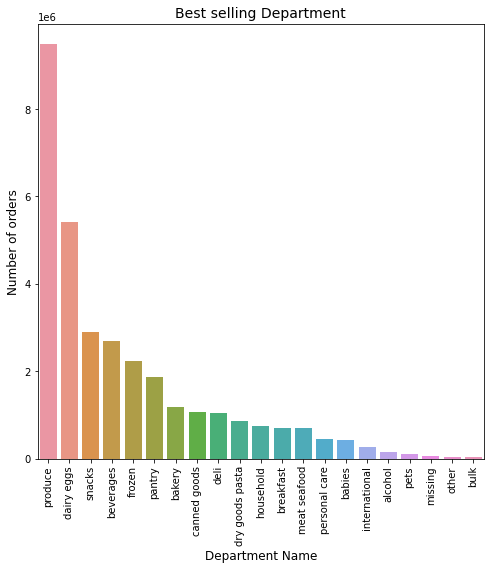

In [135]:
dept = merged_data_final['department'].value_counts()
bar_plot(dept,'Department Name','Number of orders','Best selling Department')

Key Takeaways:
Departments produce to deli have orders 1 million

# 3.12 Produce department break-down

In [136]:
produce_dept_df = merged_data_final[merged_data_final['department']=='produce']
produce_dept_df['aisle'].value_counts()

fresh fruits                  3642188
fresh vegetables              3418021
packaged vegetables fruits    1765313
fresh herbs                    377741
packaged produce               276028
Name: aisle, dtype: int64

C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


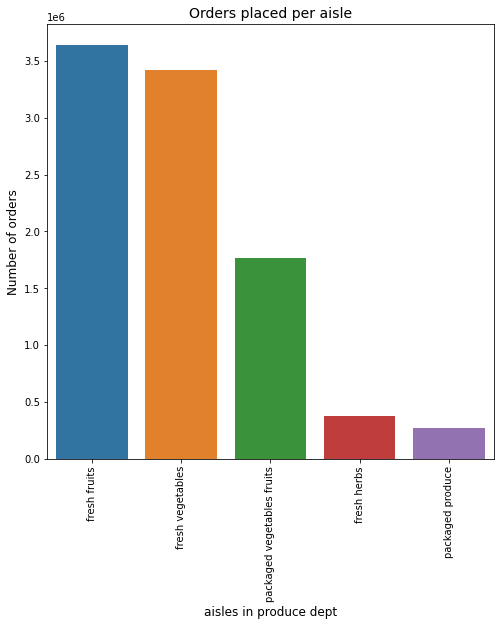

In [137]:
producedept = produce_dept_df['aisle'].value_counts()
bar_plot(producedept,'aisles in produce dept','Number of orders','Orders placed per aisle')

Key Takeaways:
>The produce department refers to fresh fruits , fresh vegetables , packaged fruits and vegetables and fresh herbs.
>Not a surprise given that fresh produce tend to be easily perishable

# 3.13 Best selling aisle overall

fresh fruits                  3642188
fresh vegetables              3418021
packaged vegetables fruits    1765313
yogurt                        1452343
packaged cheese                979763
Name: aisle, dtype: int64


C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


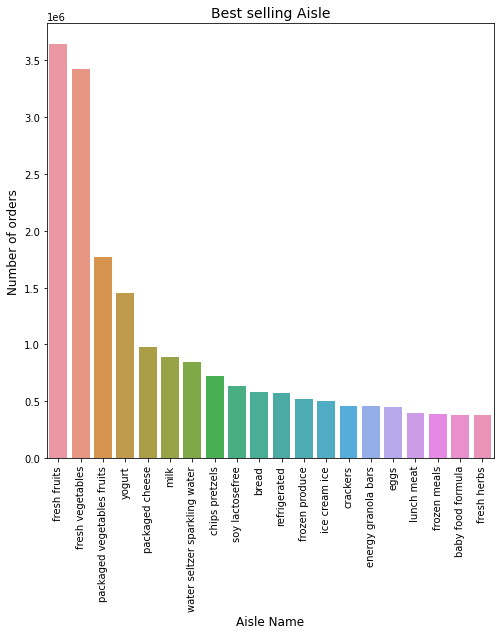

In [138]:
bestaisle = merged_data_final['aisle'].value_counts()[:20]
print(bestaisle.head())
bar_plot(bestaisle,'Aisle Name','Number of orders','Best selling Aisle')

# 3.14 Which products were ordered the most

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Name: product_name, dtype: int64


C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


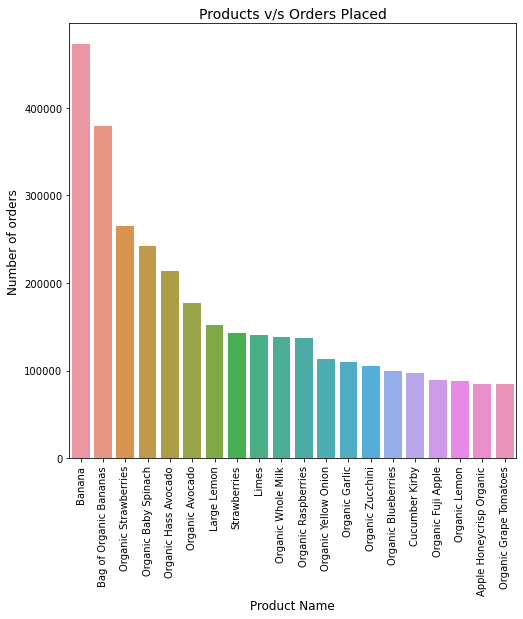

In [139]:
prdmost = merged_data_final['product_name'].value_counts()[:20]
print(prdmost.head())
bar_plot(prdmost,'Product Name','Number of orders','Products v/s Orders Placed')

<AxesSubplot:xlabel='product_name,reordered', ylabel='Number of times reordered'>

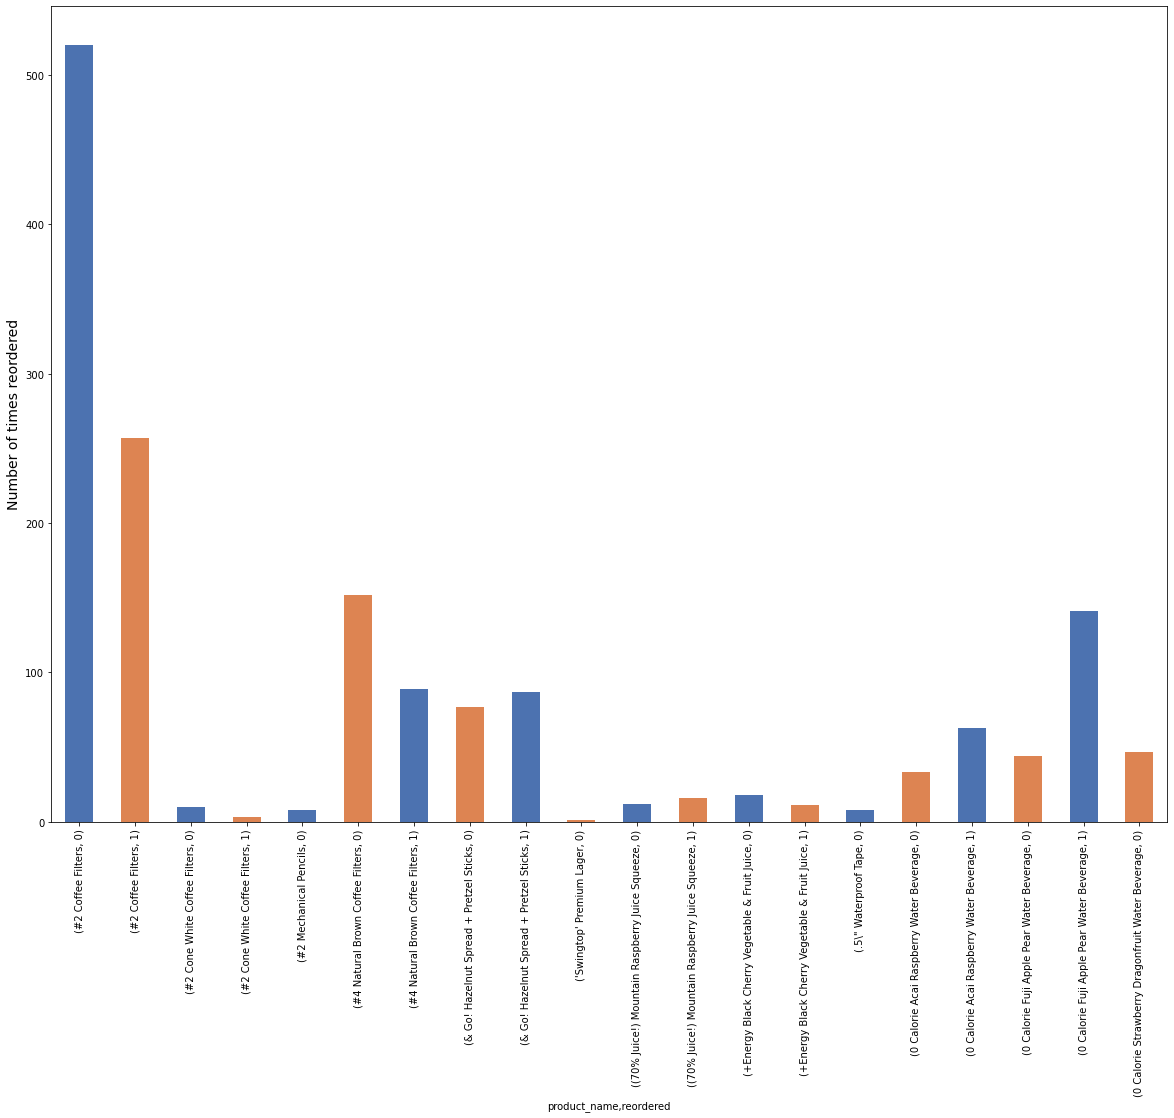

In [140]:
plt.figure(figsize=(20,15))
groups = merged_data_final.groupby(['product_name','reordered']).size()
groups = groups[:20]
groups
plt.ylabel('Number of times reordered', fontsize = 14)
groups.plot.bar(color=['#4c72b0','#dd8452'])

# 3.15 Reorder vs add to cart order

C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


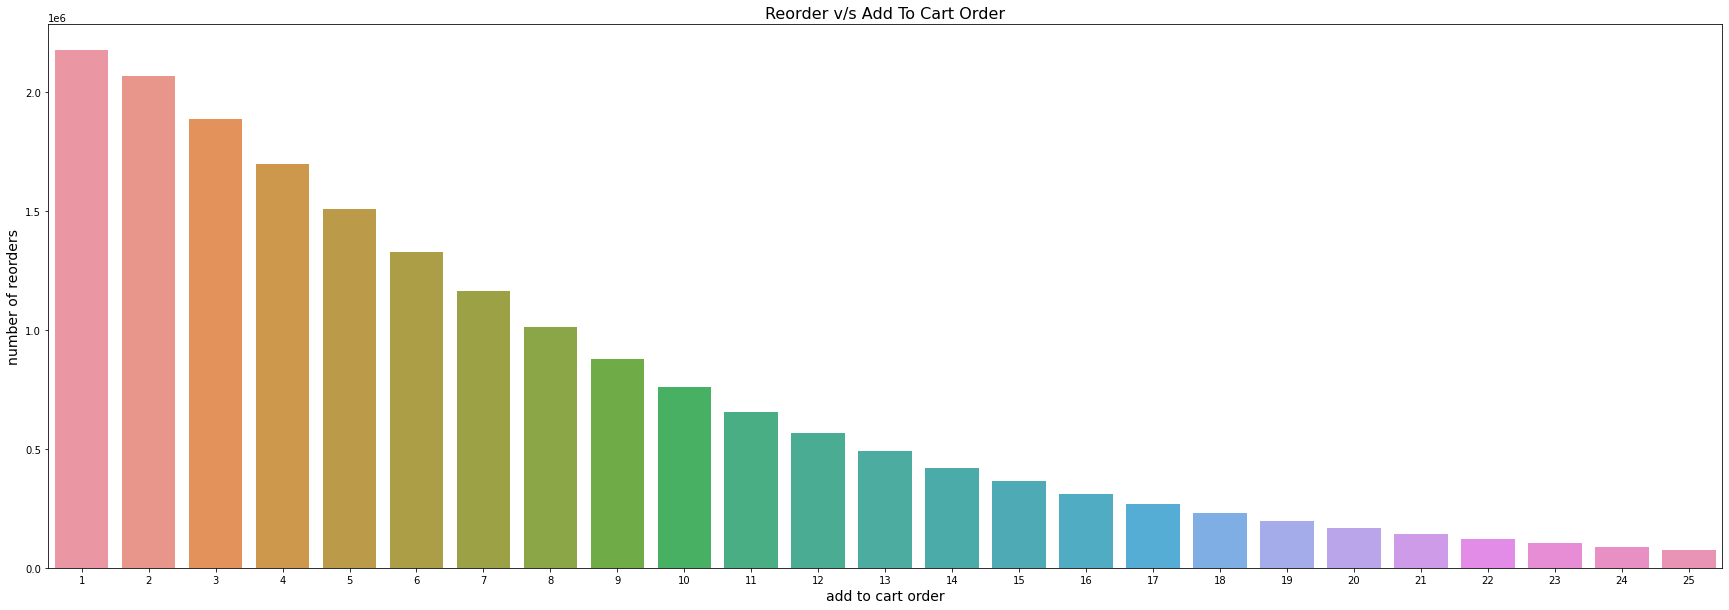

In [141]:
reordvscart = merged_data_final[merged_data_final['reordered'] == 1]['add_to_cart_order'].value_counts()[:25]
plt.figure(figsize=(30,10))
sns.barplot(reordvscart.index, reordvscart.values)
plt.ylabel('number of reorders', fontsize = 14)
plt.xlabel('add to cart order',fontsize = 14)
plt.title('Reorder v/s Add To Cart Order', fontsize = 16)
plt.show()

# 3.15 Reorder vs days since prior order

C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


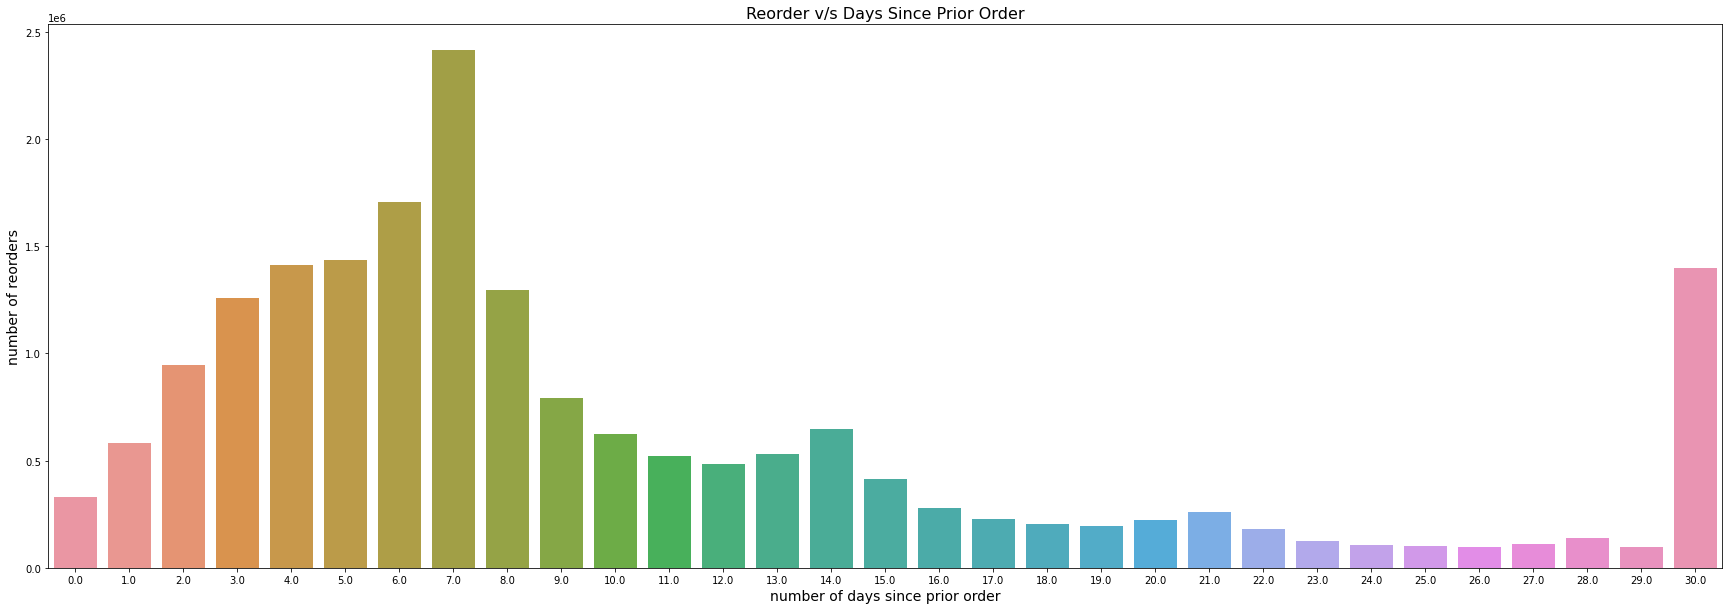

In [142]:
counts = merged_data_final[merged_data_final['reordered'] == 1]['days_since_prior_order'].value_counts()
plt.figure(figsize=(30,10))
sns.barplot(counts.index, counts.values)
plt.ylabel('number of reorders', fontsize = 14)
plt.xlabel('number of days since prior order',fontsize = 14)
plt.title('Reorder v/s Days Since Prior Order', fontsize = 16)
plt.show()

<AxesSubplot:xlabel='days_since_prior_order,reordered', ylabel='Number of Reorders'>

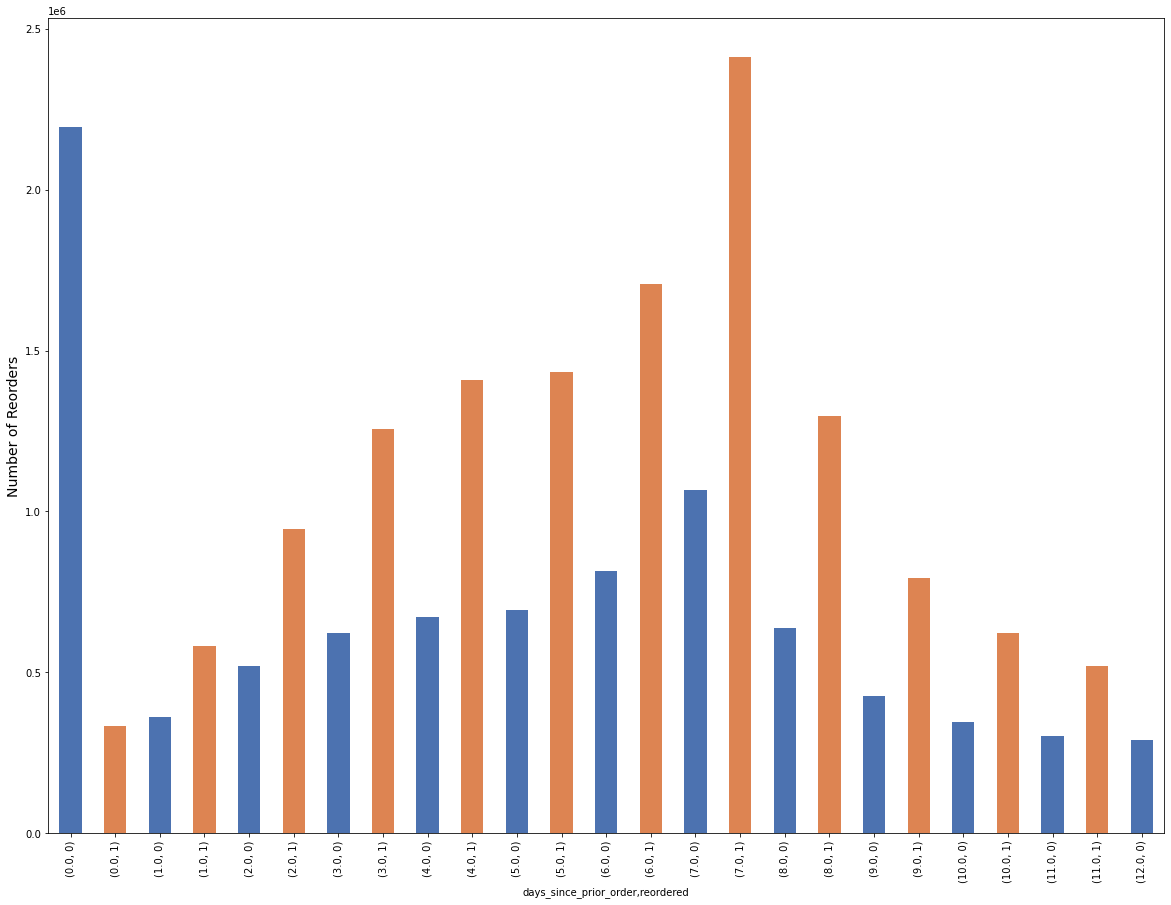

In [143]:
plt.figure(figsize=(20,15))
groups = merged_data_final.groupby(['days_since_prior_order', 'reordered']).size()
plt.ylabel('Number of Reorders', fontsize =14)
groups = groups[:25]
groups.plot.bar(color=['#4c72b0','#dd8452'])

Key Takeaways:
The maximum number of reorders are done after a gap of 7 days, 14 days and 30 days

# 3.16 Reorder vs departments

C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


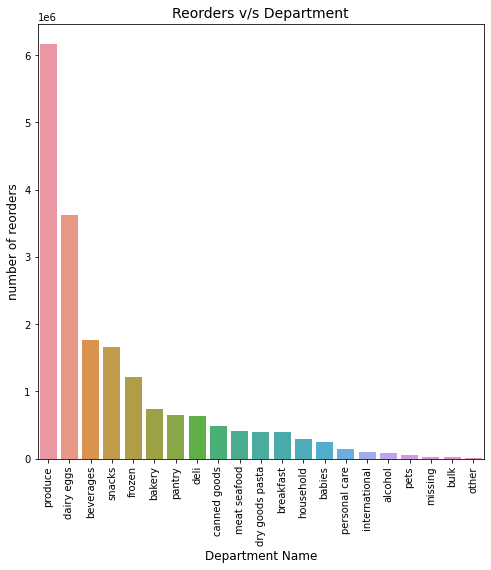

In [144]:
reorddept = merged_data_final[merged_data_final['reordered'] == 1]['department'].value_counts()
bar_plot(reorddept,'Department Name','number of reorders','Reorders v/s Department')

<AxesSubplot:xlabel='department,reordered', ylabel='Number of Reorders'>

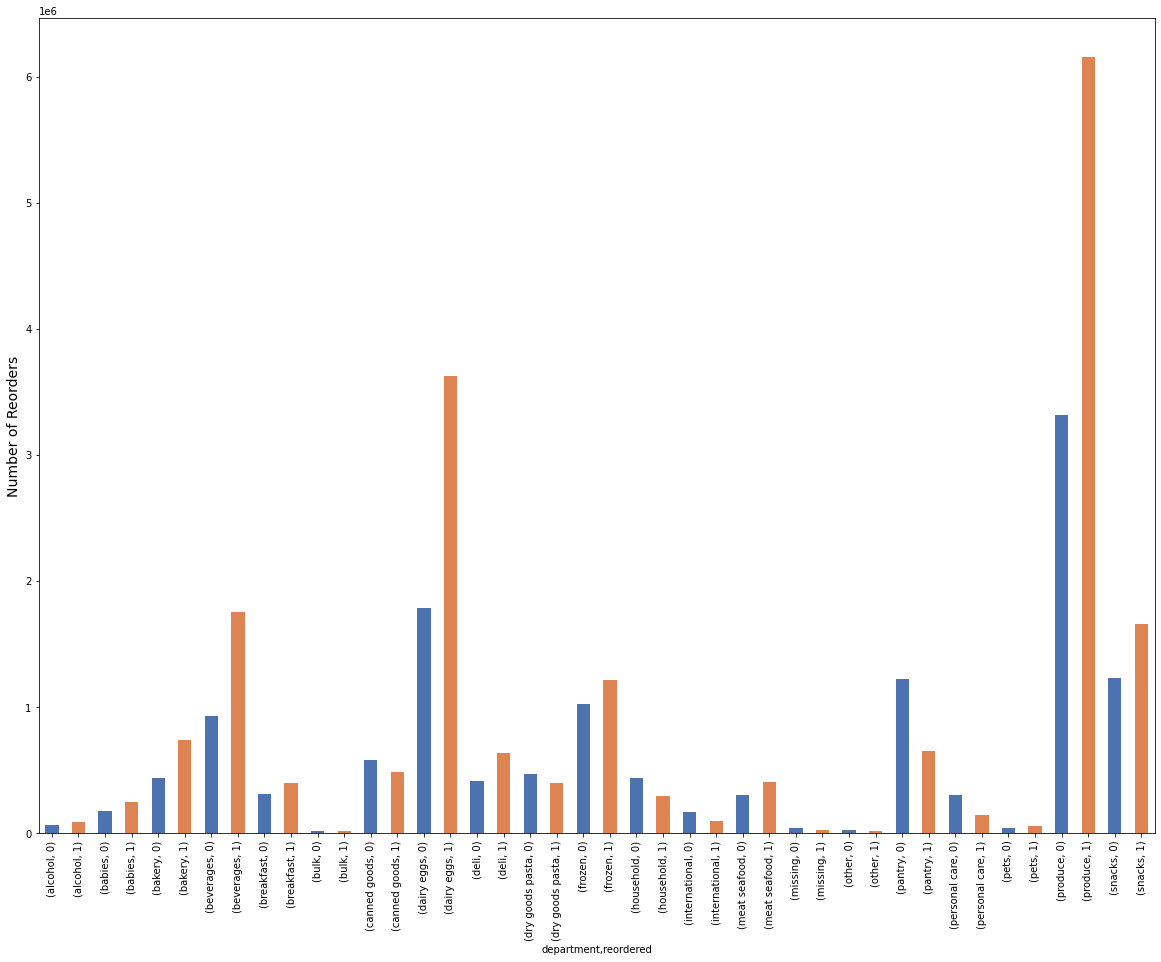

In [145]:
plt.figure(figsize=(20,15))
groups = merged_data_final.groupby(['department', 'reordered']).size()
plt.ylabel('Number of Reorders', fontsize = 14)
groups.plot.bar(color=['#4c72b0','#dd8452'])

# 3.17 Reorder vs aisle

C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


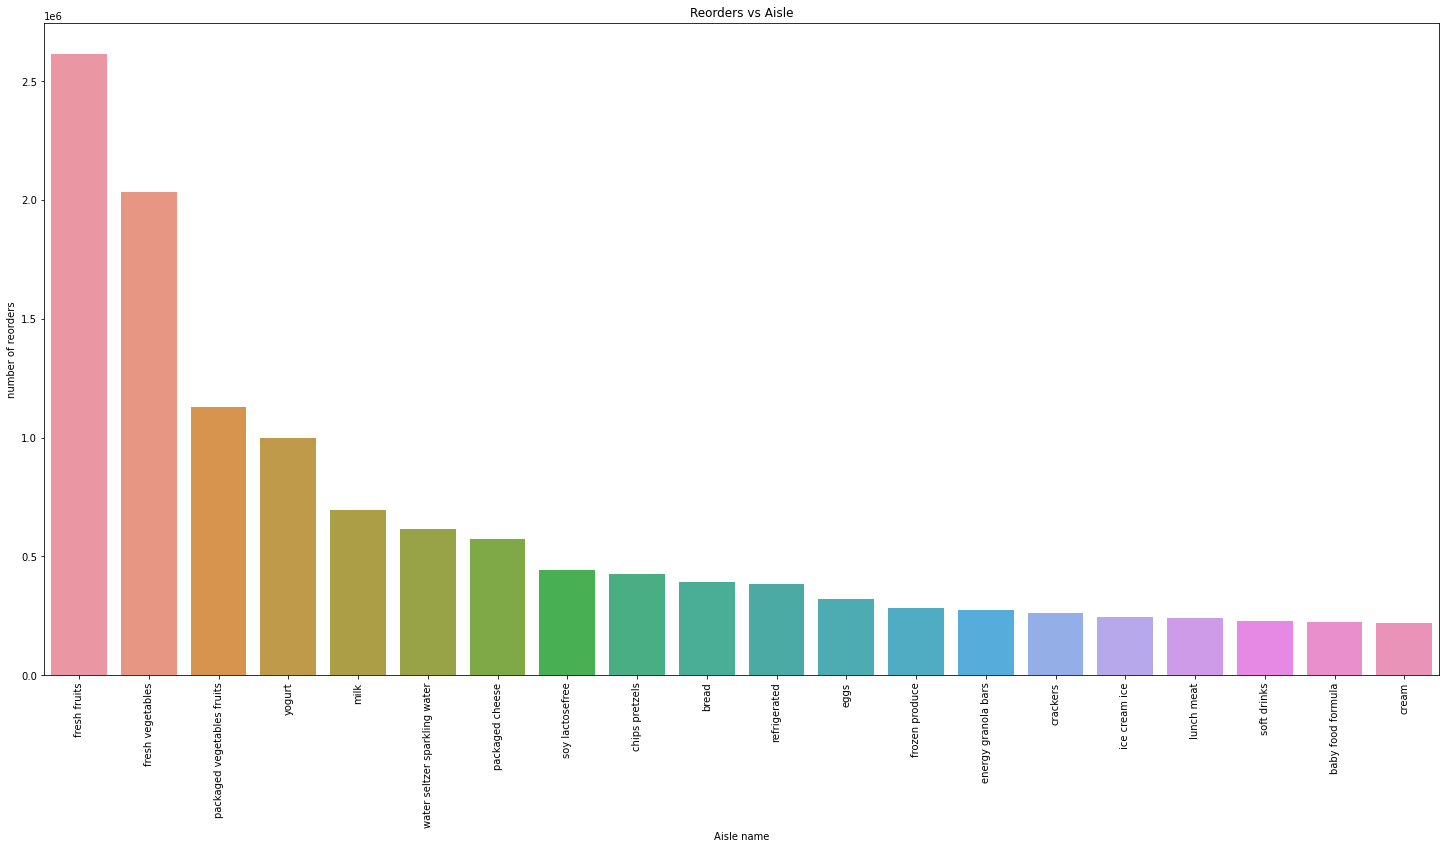

In [146]:
reordaisle = merged_data_final[merged_data_final['reordered'] == 1]['aisle'].value_counts()[:20]
plt.figure(figsize=(25,12))
sns.barplot(reordaisle.index, reordaisle.values)
plt.ylabel('number of reorders', fontsize = 10)
plt.xlabel('Aisle name', fontsize = 10)
plt.title('Reorders vs Aisle', fontsize = 12)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='aisle,reordered', ylabel='Number of Reorders'>

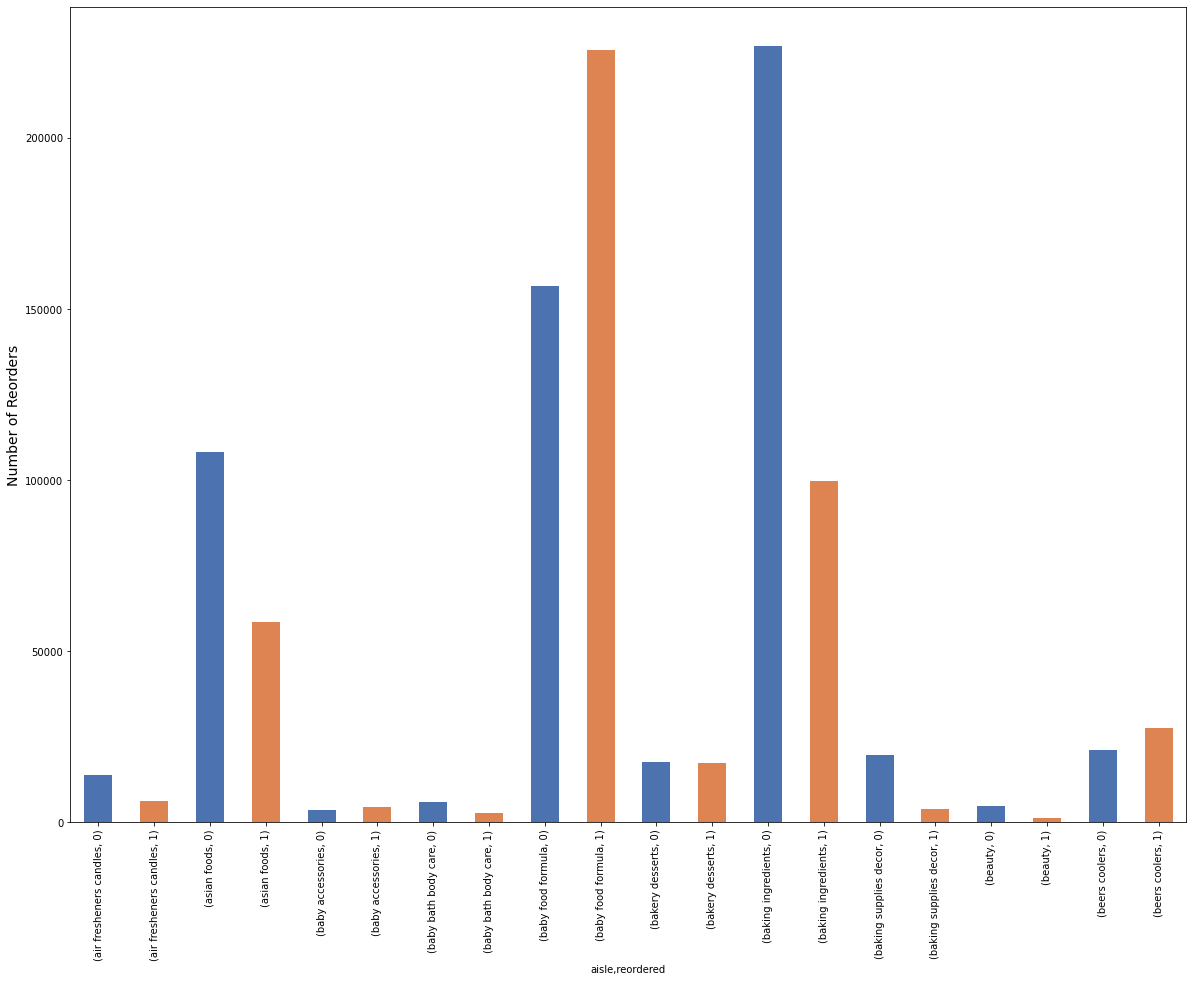

In [147]:
plt.figure(figsize=(20,15))
groups = merged_data_final.groupby(['aisle','reordered']).size()
plt.ylabel('Number of Reorders', fontsize = 14)
groups = groups[:20]
groups.plot.bar(color=['#4c72b0','#dd8452'])

# 3.18 Reorder ratio vs day of the week

In [150]:
reordow_df = merged_data_final.groupby(['order_dow'])['reordered'].aggregate("mean")
reordow_df

order_dow
0    0.585276
1    0.603843
2    0.589771
3    0.586272
4    0.590979
5    0.595470
6    0.574369
Name: reordered, dtype: float64

C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


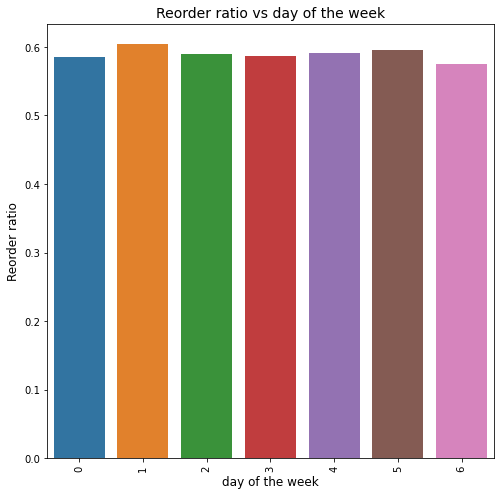

In [151]:
bar_plot(reordow_df,"day of the week","Reorder ratio","Reorder ratio vs day of the week")

# Reorder ratio vs hour of the day

In [152]:
reorhod_df = merged_data_final.groupby(['order_hour_of_day'])['reordered'].aggregate("mean")
reorhod_df

order_hour_of_day
0     0.565500
1     0.557114
2     0.554455
3     0.559498
4     0.571195
5     0.607947
6     0.636497
7     0.644473
8     0.631883
9     0.619449
10    0.600308
11    0.587324
12    0.579308
13    0.579908
14    0.581300
15    0.580738
16    0.578629
17    0.574774
18    0.573437
19    0.574228
20    0.582267
21    0.590680
22    0.585259
23    0.579653
Name: reordered, dtype: float64

C:\Users\Sanal Kondayath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


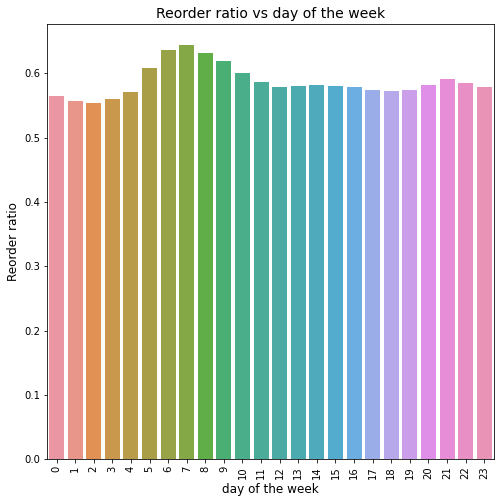

In [153]:
bar_plot(reorhod_df,"day of the week","Reorder ratio","Reorder ratio vs day of the week")